In [103]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score

In [2]:
df = pd.read_csv('../input/train.csv')

In [10]:
df['0'].value_counts()

-6.130724    1
 3.876879    1
-0.487728    1
 2.223704    1
 0.452661    1
            ..
-1.047936    1
 3.975694    1
 2.303329    1
 7.383045    1
 0.939142    1
Name: 0, Length: 6963, dtype: int64

In [12]:
df['0'].max(), df['0'].min()

(12.90296652577648, -11.85280082586596)

In [15]:
[(df[col].max(), df[col].min()) for col in df.columns]

[(12.90296652577648, -11.85280082586596),
 (34.61976193252249, -27.84171505082821),
 (9.492417153391472, -10.613443102605286),
 (11.881847339059965, -10.931016815875097),
 (26.337084405848444, -28.75281053348236),
 (2.7176397576939384, 1.0000197282212862),
 (10.887146161442251, -10.311433686093348),
 (10.071861087939908, -10.07558864048578),
 (10.213687020659158, -10.141370691129346),
 (21.91938644713234, -19.27727689772759),
 (10.559547803499854, -9.889775911580758),
 (10.92771728173683, -9.955419290980386),
 (9.737808133876529, -11.329704826492655),
 (10.091909767983989, -9.805572001877085),
 (11.104196666807796, -11.405246996038066),
 (29.89272202394659, -27.056175847169577),
 (10.638205870378508, -12.171778983384277),
 (9.721543302574174, -10.031142673522876),
 (9.8377956591487, -10.782540787265171),
 (11.75865093498245, -11.053149525688204),
 (9.383699270133738, -10.338681598485714),
 (37.61595857427567, -34.791201696299545),
 (11.498217169414922, -10.638970121299211),
 (26.914130

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6963 non-null   float64
 1   1       6963 non-null   float64
 2   2       6963 non-null   float64
 3   3       6963 non-null   float64
 4   4       6963 non-null   float64
 5   5       6963 non-null   float64
 6   6       6963 non-null   float64
 7   7       6963 non-null   float64
 8   8       6963 non-null   float64
 9   9       6963 non-null   float64
 10  10      6963 non-null   float64
 11  11      6963 non-null   float64
 12  12      6963 non-null   float64
 13  13      6963 non-null   float64
 14  14      6963 non-null   float64
 15  15      6963 non-null   float64
 16  16      6963 non-null   float64
 17  17      6963 non-null   float64
 18  18      6963 non-null   float64
 19  19      6963 non-null   float64
 20  20      6963 non-null   float64
 21  21      6963 non-null   float64
 22  

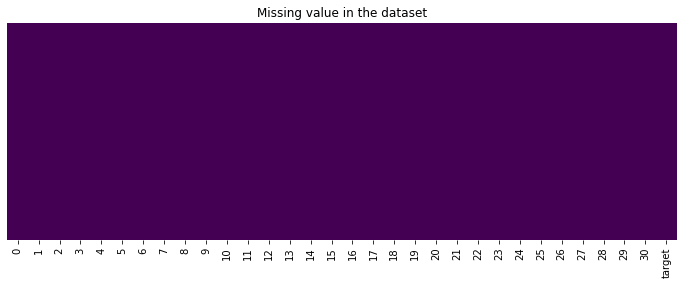

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

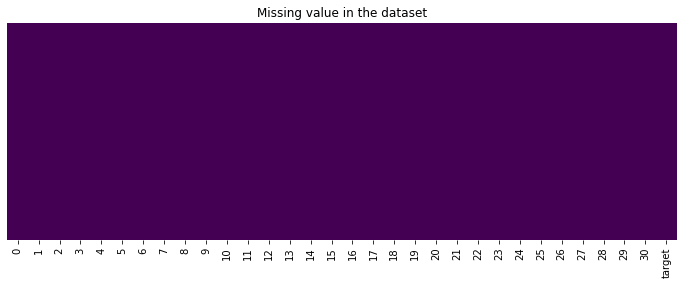

In [11]:
# Looking for Nans
plt.figure(figsize=(12,4))
sns.heatmap(pd.DataFrame([df[col] == '' \
                          for col in df.columns]).T,cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [68]:
# Находим признаки, имеющие максимальное значение коэффициента корреляции Пирсона с целевой переменной. 
# В качестве отсечки выбрано значение 0.1 по модулю
pearson = df.corr().round(2)
pearson_max_corr = (
    df['target'].to_frame().reset_index()
    .rename(columns={'target':'pearson', 'index':'feature'})
    .sort_values(by='pearson', ascending=False)
    .query('pearson > 0.2 or pearson < -0.2')
    )
pearson_max_corr

,feature,pearson
6962,6962,1
1655,1655,1
1646,1646,1
5811,5811,1
4644,4644,1
...,...,...
873,873,1
6886,6886,1
3644,3644,1
6360,6360,1


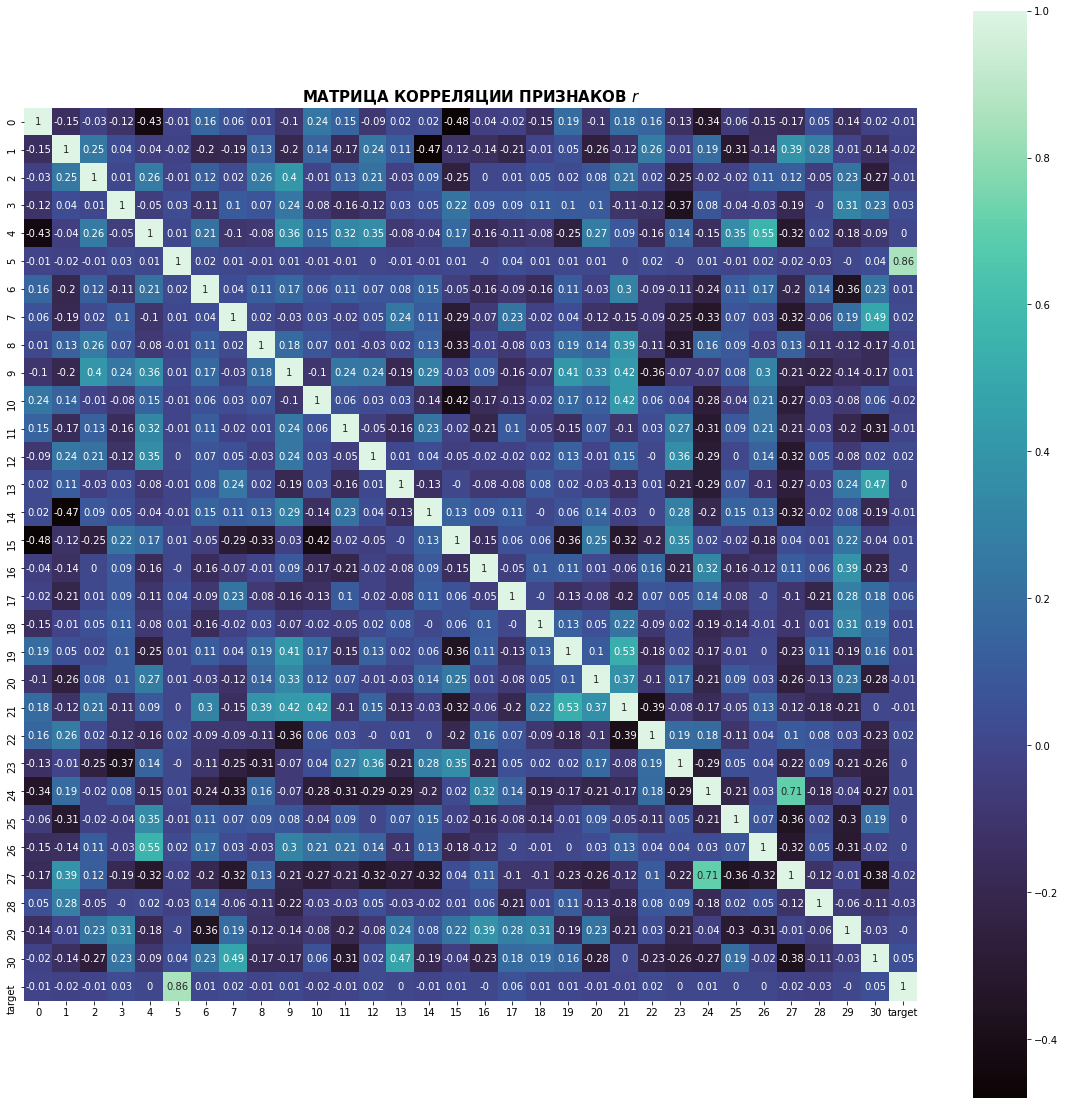

In [70]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr().round(2), annot=True, square=True, cmap='mako')
ax.set_title(label = 'МАТРИЦА КОРРЕЛЯЦИИ ПРИЗНАКОВ $r$', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.show();

In [73]:
df.target.value_counts()

0    4963
1    2000
Name: target, dtype: int64

In [77]:
# Формируем список переменных с максимальным коэффициентов корреляции phik с целевой переменной 
# считаем корреляцию phik - она позволяет находить взаимосвязи в том числе между категориальными переменными. 
# Чем ближе к единице, тем лучше
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview =  df.phik_matrix(interval_cols=df.columns)

phik_overview.round(2)

phik_max_corr = (
    phik_overview['target'].to_frame().reset_index()
    .rename(columns={'target':'phik', 'index':'feature'})
    .sort_values(by='phik', ascending=False)
    .query('phik > 0.2')
    .round(2)
    )
phik_max_corr

,feature,phik
31,target,1.00
5,5,1.00
23,23,0.24


In [145]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [125]:
y_train = df_train['target'].reset_index(drop=True)
del df_train['target']
del df_train['5']
X_train = df_train.reset_index(drop=True)

In [104]:
# Split train dataset to validation and train's parts
from sklearn.model_selection import train_test_split, GridSearchCV

X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=21)

In [105]:
# Scaling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
# X_test_scaler = scaler.transform(X_test)
X_train_part = scaler.transform(X_train_part)
X_valid = scaler.transform(X_valid)

In [107]:
%%time
# Catboost modeling

from catboost import CatBoostClassifier


ctb = CatBoostClassifier(random_seed=21, verbose=0)
ctb.fit(X_train_part, y_train_part, verbose=0)
logit_valid_pred = ctb.predict_proba(X_valid)[:, 1]
predicts = ctb.predict(X_valid)
print('Train test split CatBoostClassifier score:% s ROC AUC' % round(roc_auc_score(y_valid, logit_valid_pred), 4))
fscore = f1_score(y_valid, predicts)
print('F1-metrics CatBoostClassifier score:% s F1' % round(fscore, 4))

Train test split CatBoostClassifier score:0.9664 ROC AUC
F1-metrics CatBoostClassifier score:0.8166 F1
CPU times: user 19.2 s, sys: 571 ms, total: 19.8 s
Wall time: 2.18 s


In [192]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


In [109]:
# make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
# sgd.fit(X_train_part, y_train_part,)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('sgdclassifier', SGDClassifier())])
# print(clf.predict(X_valid))

In [131]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=21)
clf.fit(X_train_part, y_train_part)
prediction = clf.predict(X_valid)
f1_score(y_valid, prediction)

0.2964824120603015

In [613]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(tol=1e-3, random_state=21)
clf.fit(np.array(X_train), y_train)
prediction = clf.predict(X_valid)
f1_score(y_valid, prediction)

0.8097087378640776

In [614]:
preds = clf.predict(np.array(df_test))
pd.DataFrame({'target':[v for v in preds]}).to_csv('../input/sample_submission_perceptron.csv')

In [135]:
sc = StandardScaler()
sc.fit(X_train_part)
X_train_std = sc.transform(X_train_part)
X_test_std = sc.transform(X_valid)


ppn = Perceptron(max_iter = 40, eta0=0.1, random_state = 1)
ppn.fit(X_train_std, y_train_part)

y_pred = ppn.predict(X_test_std)
print('f1: %2f' %f1_score(y_valid, y_pred))

f1: 0.296535


In [7]:
from lightgbm import LGBMRegressor, LGBMClassifier, Booster

In [80]:
gridParams = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'subsample_for_bin': [20000,50000,100000,120000,150000],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100]
}


In [608]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type = 'gbdt',
                            min_child_samples = 20,
                            num_leaves = 40,
                            subsample_for_bin = 200000,
                            learning_rate=0.9,
                            max_depth=100,
#                             n_estimators=40,
                            colsample_bytree=0.6)
clf.fit(X_train_part, y_train_part)

# grid = GridSearchCV(clf, gridParams, verbose=1, cv=4, n_jobs=-1)

# grid.fit(X_train_part, y_train_part)


LGBMClassifier(colsample_bytree=0.6, learning_rate=0.9, max_depth=100,
               num_leaves=40)

In [609]:
# rint(grid.best_params_)
# print(grid.best_score_)

In [579]:
del df_test['5']

In [610]:
preds = clf.predict(df_test)
pd.DataFrame({'target':[v for v in preds]}).to_csv('../input/sample_submission_lgbm.csv')

In [607]:
round(f1_score(y_valid, clf.predict(X_valid)), 3)

0.125

In [91]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

N_THREADS = 1
N_FOLDS = 5
RANDOM_STATE = 21
TEST_SIZE = 0.2
TIMEOUT = 600 # equal to 10 minutes
TARGET_NAME = 'target'

In [92]:
task = Task(name = 'binary',
        metric = lambda y_true, y_pred: f1_score(y_true, (y_pred > 0.5)*1))
roles = {
    'target': 'target'
}
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)

In [116]:
%%time 
oof_pred = automl.fit_predict(df_train, roles = roles, verbose = 1)



[19:43:19] Stdout logging level is INFO.
[19:43:19] Task: binary

[19:43:19] Start automl preset with listed constraints:
[19:43:19] - time: 600.00 seconds
[19:43:19] - CPU: 1 cores
[19:43:19] - memory: 16 GB

[19:43:19] Train data shape: (6963, 31)

[19:43:19] Layer 1 train process start. Time left 599.38 secs
[19:43:20] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[19:43:20] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.0
[19:43:20] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[19:43:20] Time left 598.97 secs

[19:43:32] Selector_LightGBM fitting and predicting completed
[19:43:32] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[19:43:53] Time limit exceeded after calculating fold 1

[19:43:53] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.8522099447513813
[19:43:53] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[19:43:53] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.00 secs
[19:44:12]

In [117]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.63916 * (2 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.08486 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.13799 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.13799 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 


In [534]:
%%time

y_pred = automl.predict(df_test)

CPU times: user 2.34 s, sys: 325 ms, total: 2.66 s
Wall time: 3.25 s


In [583]:
pd.DataFrame({'target':[v for v in (y_pred.data[:,0] > 0.5)*1]}).to_csv('../input/sample_submission_lama.csv')

In [461]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [138]:
torch.__version__

'1.4.0'

In [508]:
df_train = pd.read_csv('../input/train.csv')
del df_train['5']
train_targets = pd.DataFrame(df_train['target'])
del df_train['target']
train_features = df_train


test_features = pd.read_csv('../input/test.csv')
del test_features['5']
ss = pd.read_csv('../input/sample_submission.csv')


In [173]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)

In [347]:
nfolds = 7
nstarts = 7
nepochs = 50
batch_size = 128
val_batch_size = batch_size * 4
ntargets = train_targets.shape[1]
targets = [t[0] for t in train_targets]
criterion = nn.BCELoss()
kfold = KFold(n_splits=7, random_state=21, shuffle=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [273]:
class MoaModel(nn.Module):
    def __init__(self, num_columns):
        super(MoaModel, self).__init__()
        self.batch_norm1 = nn.BatchNorm1d(num_columns)
        self.dropout1 = nn.Dropout(0.2)
        self.dense1 = nn.utils.weight_norm(nn.Linear(num_columns, 2048))
        
        self.batch_norm2 = nn.BatchNorm1d(2048)
        self.dropout2 = nn.Dropout(0.5)
        self.dense2 = nn.utils.weight_norm(nn.Linear(2048, 1048))
        
        self.batch_norm3 = nn.BatchNorm1d(1048)
        self.dropout3 = nn.Dropout(0.5)
        self.dense3 = nn.utils.weight_norm(nn.Linear(1048, 1))
    
    def forward(self, x):
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = F.relu(self.dense1(x))
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = F.relu(self.dense2(x))
        
        x = self.batch_norm3(x)
        x = self.dropout3(x)
        x = F.sigmoid(self.dense3(x))
        
        return x

In [365]:
# dataset class
class MoaDataset(Dataset):
    def __init__(self, df, targets, feats_idx, mode='train'):
        self.mode = mode
        self.feats = feats_idx
        self.data = df[:, feats_idx]
        if mode=='train':
            self.targets = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        if self.mode == 'train':
            return torch.FloatTensor(self.data[idx]), torch.FloatTensor(self.targets[idx])
        elif self.mode == 'test':
            return torch.FloatTensor(self.data[idx]), 0

In [369]:
df_train.columns = range(0, len(df_train.columns))
top_feats = [col for col in df_train.columns]
top_feats[:5]

[0, 1, 2, 3, 4]

In [374]:
xtrain[:,top_feats].shape

(5968, 30)

In [379]:
for seed in range(nstarts):
    print(f'Train seed {seed}')
    set_seed(seed)
    
    for n, (tr, te) in enumerate(kfold.split(train_targets, train_targets)):
        print(f'Train fold {n+1}')
        xtrain, xval = train[tr], train[te]
        ytrain, yval = train_targets[tr], train_targets[te]
        train_set = MoaDataset(xtrain, ytrain, top_feats)
        val_set = MoaDataset(xval, yval, top_feats)
        dataloaders = {
            'train': DataLoader(train_set, batch_size=batch_size, shuffle=True),
            'val': DataLoader(val_set, batch_size=val_batch_size, shuffle=False)
        }
        model = MoaModel(len(top_feats)).to(device)
        checkpoint_path = f'repeat:{seed}_Fold:{n+1}.pt'
        optimizer = optim.Adam(model.parameters(), weight_decay=1e-5)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, eps=1e-4, verbose=True)
        best_loss = {'train': np.inf, 'val': np.inf}
        
        for epoch in range(nepochs):
            epoch_loss = {'train': 0.0, 'val': 0.0}
            
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()
                
                running_loss = 0.0
                
                for i, (x, y) in enumerate(dataloaders[phase]):
                    x, y = x.to(device), y.to(device)
                    optimizer.zero_grad()
                    
                    with torch.set_grad_enabled(phase=='train'):
                        preds = model(x)

#                         print('length', preds) 
                        loss = criterion(preds, y)
                        
                        if phase=='train':
                            loss.backward()
                            optimizer.step()
                        
                    running_loss += loss.item() / len(dataloaders[phase])
                
                epoch_loss[phase] = running_loss
            
            print("Epoch {}/{}   -   loss: {:5.5f}   -   val_loss: {:5.5f}".format(epoch+1, nepochs, epoch_loss['train'], epoch_loss['val']))
            
            scheduler.step(epoch_loss['val'])
            
            if epoch_loss['val'] < best_loss['val']:
                best_loss = epoch_loss
                torch.save(model.state_dict(), checkpoint_path)

Train seed 0
Train fold 1
Epoch 1/50   -   loss: 0.53627   -   val_loss: 0.23426
Epoch 2/50   -   loss: 0.34687   -   val_loss: 0.20149
Epoch 3/50   -   loss: 0.31709   -   val_loss: 0.18458
Epoch 4/50   -   loss: 0.27838   -   val_loss: 0.16931
Epoch 5/50   -   loss: 0.26131   -   val_loss: 0.16861
Epoch 6/50   -   loss: 0.25724   -   val_loss: 0.17169
Epoch 7/50   -   loss: 0.26080   -   val_loss: 0.15241
Epoch 8/50   -   loss: 0.25472   -   val_loss: 0.15508
Epoch 9/50   -   loss: 0.24199   -   val_loss: 0.14606
Epoch 10/50   -   loss: 0.25091   -   val_loss: 0.15331
Epoch 11/50   -   loss: 0.24008   -   val_loss: 0.15580
Epoch 12/50   -   loss: 0.23629   -   val_loss: 0.15044
Epoch 13/50   -   loss: 0.24330   -   val_loss: 0.15164
Epoch    13: reducing learning rate of group 0 to 1.0000e-04.
Epoch 14/50   -   loss: 0.21692   -   val_loss: 0.14716
Epoch 15/50   -   loss: 0.21821   -   val_loss: 0.14416
Epoch 16/50   -   loss: 0.21715   -   val_loss: 0.14559
Epoch 17/50   -   loss: 0

Epoch 44/50   -   loss: 0.19970   -   val_loss: 0.13002
Epoch 45/50   -   loss: 0.19647   -   val_loss: 0.13070
Epoch 46/50   -   loss: 0.19310   -   val_loss: 0.13117
Epoch 47/50   -   loss: 0.19726   -   val_loss: 0.13110
Epoch 48/50   -   loss: 0.19205   -   val_loss: 0.13030
Epoch 49/50   -   loss: 0.18498   -   val_loss: 0.13092
Epoch 50/50   -   loss: 0.19298   -   val_loss: 0.13050
Train fold 4
Epoch 1/50   -   loss: 0.51998   -   val_loss: 0.24177
Epoch 2/50   -   loss: 0.33948   -   val_loss: 0.19983
Epoch 3/50   -   loss: 0.29619   -   val_loss: 0.20314
Epoch 4/50   -   loss: 0.28301   -   val_loss: 0.17925
Epoch 5/50   -   loss: 0.26549   -   val_loss: 0.16848
Epoch 6/50   -   loss: 0.25810   -   val_loss: 0.16780
Epoch 7/50   -   loss: 0.24537   -   val_loss: 0.15987
Epoch 8/50   -   loss: 0.24449   -   val_loss: 0.15886
Epoch 9/50   -   loss: 0.24003   -   val_loss: 0.16411
Epoch 10/50   -   loss: 0.23503   -   val_loss: 0.16428
Epoch 11/50   -   loss: 0.23403   -   val_lo

Epoch 37/50   -   loss: 0.19038   -   val_loss: 0.14550
Epoch 38/50   -   loss: 0.19587   -   val_loss: 0.14496
Epoch 39/50   -   loss: 0.18762   -   val_loss: 0.14536
Epoch 40/50   -   loss: 0.18632   -   val_loss: 0.14382
Epoch 41/50   -   loss: 0.19741   -   val_loss: 0.14490
Epoch 42/50   -   loss: 0.19273   -   val_loss: 0.14253
Epoch 43/50   -   loss: 0.19141   -   val_loss: 0.14469
Epoch 44/50   -   loss: 0.19000   -   val_loss: 0.14422
Epoch 45/50   -   loss: 0.18543   -   val_loss: 0.14142
Epoch 46/50   -   loss: 0.18539   -   val_loss: 0.14344
Epoch 47/50   -   loss: 0.18604   -   val_loss: 0.14561
Epoch 48/50   -   loss: 0.18915   -   val_loss: 0.14625
Epoch 49/50   -   loss: 0.18747   -   val_loss: 0.14406
Epoch 50/50   -   loss: 0.17580   -   val_loss: 0.14529
Train fold 7
Epoch 1/50   -   loss: 0.50862   -   val_loss: 0.23885
Epoch 2/50   -   loss: 0.33601   -   val_loss: 0.19946
Epoch 3/50   -   loss: 0.29391   -   val_loss: 0.19237
Epoch 4/50   -   loss: 0.28441   -   v

Epoch 30/50   -   loss: 0.20164   -   val_loss: 0.15622
Epoch 31/50   -   loss: 0.19657   -   val_loss: 0.15580
Epoch 32/50   -   loss: 0.20198   -   val_loss: 0.15595
Epoch 33/50   -   loss: 0.19973   -   val_loss: 0.15707
Epoch 34/50   -   loss: 0.19481   -   val_loss: 0.15570
Epoch 35/50   -   loss: 0.19697   -   val_loss: 0.15554
Epoch 36/50   -   loss: 0.19862   -   val_loss: 0.15506
Epoch 37/50   -   loss: 0.20304   -   val_loss: 0.15500
Epoch 38/50   -   loss: 0.18862   -   val_loss: 0.15335
Epoch 39/50   -   loss: 0.20788   -   val_loss: 0.15538
Epoch 40/50   -   loss: 0.20133   -   val_loss: 0.15297
Epoch 41/50   -   loss: 0.19949   -   val_loss: 0.15470
Epoch 42/50   -   loss: 0.19744   -   val_loss: 0.15353
Epoch 43/50   -   loss: 0.19593   -   val_loss: 0.15310
Epoch 44/50   -   loss: 0.19531   -   val_loss: 0.15422
Epoch 45/50   -   loss: 0.19009   -   val_loss: 0.15520
Epoch 46/50   -   loss: 0.20047   -   val_loss: 0.15341
Epoch 47/50   -   loss: 0.19919   -   val_loss: 

Epoch 23/50   -   loss: 0.21029   -   val_loss: 0.13426
Epoch 24/50   -   loss: 0.19750   -   val_loss: 0.12897
Epoch 25/50   -   loss: 0.20186   -   val_loss: 0.13023
Epoch 26/50   -   loss: 0.21320   -   val_loss: 0.12803
Epoch 27/50   -   loss: 0.19908   -   val_loss: 0.12769
Epoch 28/50   -   loss: 0.20622   -   val_loss: 0.12993
Epoch 29/50   -   loss: 0.21004   -   val_loss: 0.12750
Epoch 30/50   -   loss: 0.20734   -   val_loss: 0.12720
Epoch 31/50   -   loss: 0.20427   -   val_loss: 0.12741
Epoch 32/50   -   loss: 0.20644   -   val_loss: 0.12717
Epoch 33/50   -   loss: 0.20650   -   val_loss: 0.12715
Epoch 34/50   -   loss: 0.19977   -   val_loss: 0.12531
Epoch 35/50   -   loss: 0.20040   -   val_loss: 0.12599
Epoch 36/50   -   loss: 0.21240   -   val_loss: 0.12679
Epoch 37/50   -   loss: 0.20119   -   val_loss: 0.12445
Epoch 38/50   -   loss: 0.20093   -   val_loss: 0.12721
Epoch 39/50   -   loss: 0.19694   -   val_loss: 0.12529
Epoch 40/50   -   loss: 0.20223   -   val_loss: 

Epoch 16/50   -   loss: 0.21393   -   val_loss: 0.14063
Epoch 17/50   -   loss: 0.21127   -   val_loss: 0.13991
Epoch 18/50   -   loss: 0.23014   -   val_loss: 0.14007
Epoch 19/50   -   loss: 0.22121   -   val_loss: 0.14277
Epoch 20/50   -   loss: 0.21906   -   val_loss: 0.14132
Epoch 21/50   -   loss: 0.21635   -   val_loss: 0.13666
Epoch 22/50   -   loss: 0.21876   -   val_loss: 0.13901
Epoch 23/50   -   loss: 0.21547   -   val_loss: 0.13628
Epoch 24/50   -   loss: 0.22242   -   val_loss: 0.13622
Epoch 25/50   -   loss: 0.22263   -   val_loss: 0.13533
Epoch 26/50   -   loss: 0.21156   -   val_loss: 0.13803
Epoch 27/50   -   loss: 0.21233   -   val_loss: 0.13846
Epoch 28/50   -   loss: 0.22201   -   val_loss: 0.13817
Epoch 29/50   -   loss: 0.21630   -   val_loss: 0.13451
Epoch 30/50   -   loss: 0.20793   -   val_loss: 0.13371
Epoch 31/50   -   loss: 0.20361   -   val_loss: 0.13543
Epoch 32/50   -   loss: 0.20242   -   val_loss: 0.13729
Epoch 33/50   -   loss: 0.20883   -   val_loss: 

Epoch 10/50   -   loss: 0.23725   -   val_loss: 0.15639
Epoch 11/50   -   loss: 0.23580   -   val_loss: 0.16434
Epoch 12/50   -   loss: 0.22873   -   val_loss: 0.15424
Epoch 13/50   -   loss: 0.22076   -   val_loss: 0.15379
Epoch 14/50   -   loss: 0.23554   -   val_loss: 0.15753
Epoch 15/50   -   loss: 0.23509   -   val_loss: 0.15380
Epoch 16/50   -   loss: 0.23021   -   val_loss: 0.16151
Epoch 17/50   -   loss: 0.22639   -   val_loss: 0.15936
Epoch    17: reducing learning rate of group 0 to 1.0000e-04.
Epoch 18/50   -   loss: 0.21212   -   val_loss: 0.15305
Epoch 19/50   -   loss: 0.21251   -   val_loss: 0.15415
Epoch 20/50   -   loss: 0.19806   -   val_loss: 0.15078
Epoch 21/50   -   loss: 0.20252   -   val_loss: 0.15081
Epoch 22/50   -   loss: 0.20589   -   val_loss: 0.15104
Epoch 23/50   -   loss: 0.20341   -   val_loss: 0.15063
Epoch 24/50   -   loss: 0.19774   -   val_loss: 0.14763
Epoch 25/50   -   loss: 0.19966   -   val_loss: 0.14871
Epoch 26/50   -   loss: 0.20106   -   val_

Epoch 3/50   -   loss: 0.29758   -   val_loss: 0.17896
Epoch 4/50   -   loss: 0.27883   -   val_loss: 0.17181
Epoch 5/50   -   loss: 0.27024   -   val_loss: 0.17307
Epoch 6/50   -   loss: 0.25902   -   val_loss: 0.17141
Epoch 7/50   -   loss: 0.24859   -   val_loss: 0.15943
Epoch 8/50   -   loss: 0.25064   -   val_loss: 0.16078
Epoch 9/50   -   loss: 0.25252   -   val_loss: 0.16173
Epoch 10/50   -   loss: 0.25654   -   val_loss: 0.18370
Epoch 11/50   -   loss: 0.24119   -   val_loss: 0.16557
Epoch    11: reducing learning rate of group 0 to 1.0000e-04.
Epoch 12/50   -   loss: 0.23584   -   val_loss: 0.15566
Epoch 13/50   -   loss: 0.20984   -   val_loss: 0.15603
Epoch 14/50   -   loss: 0.21783   -   val_loss: 0.15593
Epoch 15/50   -   loss: 0.21907   -   val_loss: 0.15117
Epoch 16/50   -   loss: 0.21710   -   val_loss: 0.15580
Epoch 17/50   -   loss: 0.20681   -   val_loss: 0.15444
Epoch 18/50   -   loss: 0.21419   -   val_loss: 0.15075
Epoch 19/50   -   loss: 0.20979   -   val_loss: 0

Epoch 46/50   -   loss: 0.19149   -   val_loss: 0.15084
Epoch 47/50   -   loss: 0.19551   -   val_loss: 0.15353
Epoch 48/50   -   loss: 0.19299   -   val_loss: 0.15443
Epoch 49/50   -   loss: 0.18676   -   val_loss: 0.15277
Epoch 50/50   -   loss: 0.18667   -   val_loss: 0.15277
Train fold 3
Epoch 1/50   -   loss: 0.52943   -   val_loss: 0.23581
Epoch 2/50   -   loss: 0.33845   -   val_loss: 0.19824
Epoch 3/50   -   loss: 0.29219   -   val_loss: 0.17566
Epoch 4/50   -   loss: 0.29013   -   val_loss: 0.15926
Epoch 5/50   -   loss: 0.27276   -   val_loss: 0.16703
Epoch 6/50   -   loss: 0.25875   -   val_loss: 0.15393
Epoch 7/50   -   loss: 0.25104   -   val_loss: 0.15881
Epoch 8/50   -   loss: 0.24108   -   val_loss: 0.14759
Epoch 9/50   -   loss: 0.25072   -   val_loss: 0.15590
Epoch 10/50   -   loss: 0.24107   -   val_loss: 0.14922
Epoch 11/50   -   loss: 0.23487   -   val_loss: 0.15455
Epoch 12/50   -   loss: 0.22903   -   val_loss: 0.14692
Epoch 13/50   -   loss: 0.23950   -   val_lo

Epoch 39/50   -   loss: 0.19468   -   val_loss: 0.12259
Epoch 40/50   -   loss: 0.19755   -   val_loss: 0.12265
Epoch 41/50   -   loss: 0.19705   -   val_loss: 0.12268
Epoch 42/50   -   loss: 0.20244   -   val_loss: 0.12445
Epoch 43/50   -   loss: 0.19125   -   val_loss: 0.12550
Epoch 44/50   -   loss: 0.19330   -   val_loss: 0.12496
Epoch 45/50   -   loss: 0.19392   -   val_loss: 0.12287
Epoch 46/50   -   loss: 0.19153   -   val_loss: 0.12258
Epoch 47/50   -   loss: 0.20343   -   val_loss: 0.12327
Epoch 48/50   -   loss: 0.18395   -   val_loss: 0.12589
Epoch 49/50   -   loss: 0.18051   -   val_loss: 0.12263
Epoch 50/50   -   loss: 0.19699   -   val_loss: 0.12062
Train fold 6
Epoch 1/50   -   loss: 0.49399   -   val_loss: 0.23369
Epoch 2/50   -   loss: 0.33607   -   val_loss: 0.21210
Epoch 3/50   -   loss: 0.28666   -   val_loss: 0.18829
Epoch 4/50   -   loss: 0.26997   -   val_loss: 0.19643
Epoch 5/50   -   loss: 0.26511   -   val_loss: 0.17170
Epoch 6/50   -   loss: 0.25974   -   val

Epoch 32/50   -   loss: 0.20420   -   val_loss: 0.13727
Epoch 33/50   -   loss: 0.20944   -   val_loss: 0.13409
Epoch 34/50   -   loss: 0.21344   -   val_loss: 0.13178
Epoch 35/50   -   loss: 0.20545   -   val_loss: 0.13403
Epoch 36/50   -   loss: 0.20858   -   val_loss: 0.13122
Epoch 37/50   -   loss: 0.19885   -   val_loss: 0.13120
Epoch 38/50   -   loss: 0.21097   -   val_loss: 0.12919
Epoch 39/50   -   loss: 0.20719   -   val_loss: 0.13310
Epoch 40/50   -   loss: 0.20695   -   val_loss: 0.13431
Epoch 41/50   -   loss: 0.20409   -   val_loss: 0.13107
Epoch 42/50   -   loss: 0.21255   -   val_loss: 0.12874
Epoch 43/50   -   loss: 0.20069   -   val_loss: 0.13028
Epoch 44/50   -   loss: 0.20214   -   val_loss: 0.13413
Epoch 45/50   -   loss: 0.19750   -   val_loss: 0.13211
Epoch 46/50   -   loss: 0.19802   -   val_loss: 0.12930
Epoch 47/50   -   loss: 0.19870   -   val_loss: 0.13040
Epoch 48/50   -   loss: 0.20244   -   val_loss: 0.13110
Epoch 49/50   -   loss: 0.19774   -   val_loss: 

Epoch 25/50   -   loss: 0.20663   -   val_loss: 0.14371
Epoch 26/50   -   loss: 0.20056   -   val_loss: 0.14581
Epoch 27/50   -   loss: 0.20132   -   val_loss: 0.14290
Epoch 28/50   -   loss: 0.19671   -   val_loss: 0.14371
Epoch 29/50   -   loss: 0.20512   -   val_loss: 0.14239
Epoch 30/50   -   loss: 0.19979   -   val_loss: 0.14257
Epoch 31/50   -   loss: 0.20937   -   val_loss: 0.14431
Epoch 32/50   -   loss: 0.19958   -   val_loss: 0.14261
Epoch 33/50   -   loss: 0.20557   -   val_loss: 0.14152
Epoch 34/50   -   loss: 0.20478   -   val_loss: 0.14175
Epoch 35/50   -   loss: 0.20592   -   val_loss: 0.14020
Epoch 36/50   -   loss: 0.19450   -   val_loss: 0.14326
Epoch 37/50   -   loss: 0.20569   -   val_loss: 0.14224
Epoch 38/50   -   loss: 0.20321   -   val_loss: 0.14494
Epoch 39/50   -   loss: 0.19604   -   val_loss: 0.14177
Epoch 40/50   -   loss: 0.19848   -   val_loss: 0.14218
Epoch 41/50   -   loss: 0.20649   -   val_loss: 0.14109
Epoch 42/50   -   loss: 0.19607   -   val_loss: 

Epoch 18/50   -   loss: 0.20510   -   val_loss: 0.15322
Epoch 19/50   -   loss: 0.19948   -   val_loss: 0.15077
Epoch 20/50   -   loss: 0.20569   -   val_loss: 0.14936
Epoch 21/50   -   loss: 0.20954   -   val_loss: 0.14756
Epoch 22/50   -   loss: 0.20269   -   val_loss: 0.15101
Epoch 23/50   -   loss: 0.19354   -   val_loss: 0.14863
Epoch 24/50   -   loss: 0.19617   -   val_loss: 0.14648
Epoch 25/50   -   loss: 0.21693   -   val_loss: 0.14859
Epoch 26/50   -   loss: 0.20168   -   val_loss: 0.14734
Epoch 27/50   -   loss: 0.21270   -   val_loss: 0.14781
Epoch 28/50   -   loss: 0.20036   -   val_loss: 0.14967
Epoch 29/50   -   loss: 0.20394   -   val_loss: 0.14452
Epoch 30/50   -   loss: 0.20754   -   val_loss: 0.14334
Epoch 31/50   -   loss: 0.19694   -   val_loss: 0.14732
Epoch 32/50   -   loss: 0.19706   -   val_loss: 0.14388
Epoch 33/50   -   loss: 0.19831   -   val_loss: 0.14721
Epoch 34/50   -   loss: 0.20631   -   val_loss: 0.14252
Epoch 35/50   -   loss: 0.19859   -   val_loss: 

Epoch 12/50   -   loss: 0.22167   -   val_loss: 0.14362
Epoch 13/50   -   loss: 0.23515   -   val_loss: 0.14392
Epoch 14/50   -   loss: 0.22432   -   val_loss: 0.14534
Epoch 15/50   -   loss: 0.22504   -   val_loss: 0.14201
Epoch    15: reducing learning rate of group 0 to 1.0000e-04.
Epoch 16/50   -   loss: 0.21423   -   val_loss: 0.13639
Epoch 17/50   -   loss: 0.21453   -   val_loss: 0.13606
Epoch 18/50   -   loss: 0.21386   -   val_loss: 0.13551
Epoch 19/50   -   loss: 0.20938   -   val_loss: 0.13392
Epoch 20/50   -   loss: 0.20192   -   val_loss: 0.13251
Epoch 21/50   -   loss: 0.20828   -   val_loss: 0.13274
Epoch 22/50   -   loss: 0.20819   -   val_loss: 0.13493
Epoch 23/50   -   loss: 0.20284   -   val_loss: 0.13367
Epoch 24/50   -   loss: 0.21372   -   val_loss: 0.13092
Epoch 25/50   -   loss: 0.20264   -   val_loss: 0.13188
Epoch 26/50   -   loss: 0.20552   -   val_loss: 0.13255
Epoch 27/50   -   loss: 0.21414   -   val_loss: 0.13287
Epoch 28/50   -   loss: 0.20101   -   val_

Epoch 5/50   -   loss: 0.26556   -   val_loss: 0.18908
Epoch 6/50   -   loss: 0.25744   -   val_loss: 0.19795
Epoch 7/50   -   loss: 0.25696   -   val_loss: 0.18601
Epoch 8/50   -   loss: 0.24055   -   val_loss: 0.17284
Epoch 9/50   -   loss: 0.25145   -   val_loss: 0.16406
Epoch 10/50   -   loss: 0.23462   -   val_loss: 0.17416
Epoch 11/50   -   loss: 0.24029   -   val_loss: 0.17038
Epoch 12/50   -   loss: 0.22913   -   val_loss: 0.16893
Epoch 13/50   -   loss: 0.22803   -   val_loss: 0.17434
Epoch    13: reducing learning rate of group 0 to 1.0000e-04.
Epoch 14/50   -   loss: 0.21657   -   val_loss: 0.16125
Epoch 15/50   -   loss: 0.20876   -   val_loss: 0.15715
Epoch 16/50   -   loss: 0.21700   -   val_loss: 0.15776
Epoch 17/50   -   loss: 0.20668   -   val_loss: 0.15294
Epoch 18/50   -   loss: 0.20302   -   val_loss: 0.15487
Epoch 19/50   -   loss: 0.20382   -   val_loss: 0.15339
Epoch 20/50   -   loss: 0.21267   -   val_loss: 0.15163
Epoch 21/50   -   loss: 0.20758   -   val_loss:

Epoch 48/50   -   loss: 0.20047   -   val_loss: 0.12668
Epoch 49/50   -   loss: 0.19447   -   val_loss: 0.13080
Epoch 50/50   -   loss: 0.19592   -   val_loss: 0.12449
Train fold 2
Epoch 1/50   -   loss: 0.53165   -   val_loss: 0.26027
Epoch 2/50   -   loss: 0.35186   -   val_loss: 0.23017
Epoch 3/50   -   loss: 0.29287   -   val_loss: 0.20452
Epoch 4/50   -   loss: 0.27007   -   val_loss: 0.18847
Epoch 5/50   -   loss: 0.26644   -   val_loss: 0.19281
Epoch 6/50   -   loss: 0.25672   -   val_loss: 0.18239
Epoch 7/50   -   loss: 0.25515   -   val_loss: 0.18269
Epoch 8/50   -   loss: 0.25744   -   val_loss: 0.17721
Epoch 9/50   -   loss: 0.24401   -   val_loss: 0.18246
Epoch 10/50   -   loss: 0.23220   -   val_loss: 0.17707
Epoch 11/50   -   loss: 0.22778   -   val_loss: 0.16555
Epoch 12/50   -   loss: 0.24238   -   val_loss: 0.17034
Epoch 13/50   -   loss: 0.22465   -   val_loss: 0.17539
Epoch 14/50   -   loss: 0.21896   -   val_loss: 0.17141
Epoch 15/50   -   loss: 0.21958   -   val_lo

Epoch 41/50   -   loss: 0.19488   -   val_loss: 0.14022
Epoch 42/50   -   loss: 0.18809   -   val_loss: 0.14154
Epoch 43/50   -   loss: 0.18837   -   val_loss: 0.14138
Epoch 44/50   -   loss: 0.19001   -   val_loss: 0.13842
Epoch 45/50   -   loss: 0.18608   -   val_loss: 0.13992
Epoch 46/50   -   loss: 0.18700   -   val_loss: 0.13774
Epoch 47/50   -   loss: 0.19359   -   val_loss: 0.13862
Epoch 48/50   -   loss: 0.20099   -   val_loss: 0.13826
Epoch 49/50   -   loss: 0.18898   -   val_loss: 0.14123
Epoch 50/50   -   loss: 0.19053   -   val_loss: 0.14247
Train fold 5
Epoch 1/50   -   loss: 0.49228   -   val_loss: 0.22126
Epoch 2/50   -   loss: 0.34380   -   val_loss: 0.18632
Epoch 3/50   -   loss: 0.31346   -   val_loss: 0.17249
Epoch 4/50   -   loss: 0.27519   -   val_loss: 0.15740
Epoch 5/50   -   loss: 0.27385   -   val_loss: 0.15214
Epoch 6/50   -   loss: 0.26595   -   val_loss: 0.15087
Epoch 7/50   -   loss: 0.25971   -   val_loss: 0.14704
Epoch 8/50   -   loss: 0.24719   -   val_l

Epoch 34/50   -   loss: 0.19357   -   val_loss: 0.14813
Epoch 35/50   -   loss: 0.18271   -   val_loss: 0.14313
Epoch 36/50   -   loss: 0.19469   -   val_loss: 0.14465
Epoch 37/50   -   loss: 0.19165   -   val_loss: 0.14308
Epoch 38/50   -   loss: 0.19762   -   val_loss: 0.14121
Epoch 39/50   -   loss: 0.18906   -   val_loss: 0.14692
Epoch 40/50   -   loss: 0.19293   -   val_loss: 0.14201
Epoch 41/50   -   loss: 0.20078   -   val_loss: 0.14584
Epoch 42/50   -   loss: 0.19814   -   val_loss: 0.14415
Epoch 43/50   -   loss: 0.18638   -   val_loss: 0.14044
Epoch 44/50   -   loss: 0.19753   -   val_loss: 0.14224
Epoch 45/50   -   loss: 0.19539   -   val_loss: 0.14408
Epoch 46/50   -   loss: 0.18415   -   val_loss: 0.14250
Epoch 47/50   -   loss: 0.19978   -   val_loss: 0.14202
Epoch 48/50   -   loss: 0.18923   -   val_loss: 0.13967
Epoch 49/50   -   loss: 0.17589   -   val_loss: 0.14409
Epoch 50/50   -   loss: 0.18885   -   val_loss: 0.14029


In [499]:
oof = np.zeros((len(train), nstarts, ntargets))
oof_targets = np.zeros((len(train), ntargets))
preds = np.zeros((len(test), ntargets))

In [458]:
def mean_log_loss(y_true, y_pred):
    print(targets)
    metrics = []
    for i, target in enumerate([0]):
        print(f'-{i}-', y_pred[:, i])
        metrics.append(log_loss(y_true[:, i], y_pred[:, i].astype(float), labels=[0,1]))
    return np.mean(metrics)

In [500]:
for seed in range(nstarts):
    print(f"Inference for seed {seed}")
    seed_targets = []
    seed_oof = []
    seed_preds = np.zeros((len(test), ntargets, nfolds))
    
    for n, (tr, te) in enumerate(kfold.split(train_targets, train_targets)):
        xval, yval = train[te], train_targets[te]
        fold_preds = []
        
        val_set = MoaDataset(xval, yval, top_feats)
        test_set = MoaDataset(test, None, top_feats, mode='test')
        
        dataloaders = {
            'val': DataLoader(val_set, batch_size=val_batch_size, shuffle=False),
            'test': DataLoader(test_set, batch_size=val_batch_size, shuffle=False)
        }
        
        checkpoint_path = f'repeat:{seed}_Fold:{n+1}.pt'
        model = MoaModel(len(top_feats)).to(device)
        model.load_state_dict(torch.load(checkpoint_path))
        model.eval()
        
        for phase in ['val', 'test']:
            for i, (x, y) in enumerate(dataloaders[phase]):
                if phase == 'val':
                    x, y = x.to(device), y.to(device)
                elif phase == 'test':
                    x = x.to(device)
                
                with torch.no_grad():
                    batch_preds = model(x)
                    
                    
                    if phase == 'val':
                        seed_targets.append(y)
                        seed_oof.append(batch_preds)
                    elif phase == 'test':
                        fold_preds.append(batch_preds)
                    
        fold_preds = torch.cat(fold_preds, dim=0).cpu().numpy()
        seed_preds[:, :, n] = fold_preds
        
    seed_targets = torch.cat(seed_targets, dim=0).cpu().numpy()
    seed_oof = torch.cat(seed_oof, dim=0).cpu().numpy()
    seed_preds = np.mean(seed_preds, axis=2)
    print(seed_targets.shape, seed_oof.shape)
    print("Score for this seed {:5.5f}".format(log_loss(seed_targets, seed_oof)))
    print("F1 score {:5.2f}".format(f1_score([int(v[0]) for v in seed_targets], [v[0] for v in ((seed_oof > 0.5) * 1)])))
    oof_targets = seed_targets
    oof[:, seed, :] = seed_oof
    preds += seed_preds / nstarts

oof = np.mean(oof, axis=1)
print("Overall score is {:5.5f}".format(log_loss(oof_targets, oof)))

Inference for seed 0
(6963, 1) (6963, 1)
Score for this seed 0.13581
F1 score  0.91
Inference for seed 1
(6963, 1) (6963, 1)
Score for this seed 0.13644
F1 score  0.91
Inference for seed 2
(6963, 1) (6963, 1)
Score for this seed 0.13513
F1 score  0.91
Inference for seed 3
(6963, 1) (6963, 1)
Score for this seed 0.13545
F1 score  0.91
Inference for seed 4
(6963, 1) (6963, 1)
Score for this seed 0.13591
F1 score  0.91
Inference for seed 5
(6963, 1) (6963, 1)
Score for this seed 0.13656
F1 score  0.91
Inference for seed 6
(6963, 1) (6963, 1)
Score for this seed 0.13530
F1 score  0.91
Overall score is 0.13466


In [519]:
model = MoaModel(len(top_feats)).to(device)
model.load_state_dict(torch.load(checkpoint_path))
model.eval()
for x in test_features.values:
    x = x.to(device)
    with torch.no_grad():
        batch_preds = model(x)
#     print(model(x))

AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [525]:
((preds > 0.5) * 1).shape

(3920, 1)

In [522]:
test_features.values.shape

(3920, 30)

In [533]:
pd.DataFrame({'target':[v[0] for v in (preds > 0.5) * 1]}).to_csv('../input/sample_submission.csv')